import gdal
import glob

In [155]:
# grab the jepsen files
files = glob.glob('/Volumes/hydroData/JepsenData/jepsen_usgspostdoc/D_drive/2010_sem1/swerecon_runs/GLV/*/swe.mdl')

In [156]:
ds = gdal.Open(files[0],gdal.GA_ReadOnly) # open the datasource

srs = ds.GetProjection() # get the projection of the input data set
transform = ds.GetGeoTransform() # get the limits and resolution of the input data set
m = ds.RasterXSize # get raster dimensions
n = ds.RasterYSize

In [159]:
clim = np.ndarray((n,m))

In [161]:
ct = 0
for fl in files:
    ds = gdal.Open(fl,gdal.GA_ReadOnly) # open the datasource
    y = ds.RasterCount-(24*31) # depth
    for i in np.arange((24*31)+1,y+1):
        clim += ds.GetRasterBand(i).ReadAsArray()
        ct += 1
        
clim /= ct

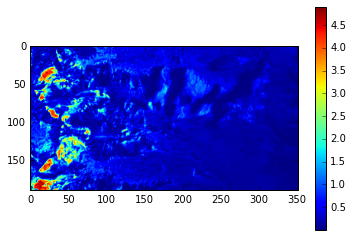

In [163]:
plt.imshow(clim)
plt.colorbar()

In [164]:
outfl = './data/swe_climatology_jepsen.tiff'

In [168]:
output = gdal.GetDriverByName('GTiff').Create(outfl,m,n,1,gdal.GDT_Float32) # open the output file
output.SetGeoTransform(transform) # set coordinates
output.SetProjection(srs) # set projection
output.GetRasterBand(1).WriteArray(clim)
output = None

#### Second attempt to Process Data using alternate method

Values still seem low, but hopefully the spatial pattern is correct for precip scaling.

In [131]:
import spectral as sp

In [134]:
ds = sp.open_image(files[0]+'.hdr')

In [136]:
print ds

	Data Source:   '/Volumes/hydroData/JepsenData/jepsen_usgspostdoc/D_drive/2010_sem1/swerecon_runs/GLV/1996/swe.mdl'
	# Rows:            190
	# Samples:         352
	# Bands:          4416
	Interleave:        BSQ
	Quantization:  32 bits
	Data format:   float32


In [137]:
ds = sp.io.envi.open(files[0]+'.hdr',files[0])

In [146]:
rast = ds[:,:,0]

In [147]:
rast.shape

(190, 352, 1)

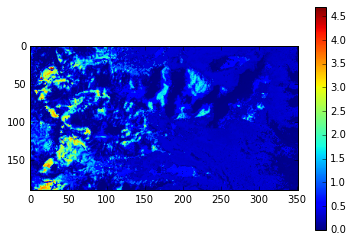

In [148]:
plt.imshow(rast[:,:,0])
plt.colorbar()